Goal - seperate Red wine and White wine!

시작하기전에, train과 test을 병합하여 full_df로 만들어 진행하는 방법이 있습니다. <br>
그러나, [교육]을 위해 train과 test를 따로 보겠습니다.

# LIBRARY

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

plt.style.use('fivethirtyeight')

# DATA ANALYSIS & CLEANING

In [2]:
#Load Data!
train= pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")
sample_submisson= pd.read_csv("data/sample_submission.csv")

* index 구분자
* quality 품질
* fixed acidity 산도
* volatile acidity 휘발성산
* citric acid 시트르산
* residual sugar 잔당 : 발효 후 와인 속에 남아있는 당분
* chlorides 염화물
* free sulfur dioxide 독립 이산화황
* total sulfur dioxide 총 이산화황
* density 밀도
* pH 수소이온농도
* sulphates 황산염
* alcohol 도수
* type 종류

In [3]:
#drop index column
train= train.drop(['index'],axis=1)
train.head(5)

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white


In [4]:
train.shape, test.shape

((5497, 13), (1000, 13))

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 1000 non-null   int64  
 1   fixed acidity         1000 non-null   float64
 2   volatile acidity      1000 non-null   float64
 3   citric acid           1000 non-null   float64
 4   residual sugar        1000 non-null   float64
 5   chlorides             1000 non-null   float64
 6   free sulfur dioxide   1000 non-null   float64
 7   total sulfur dioxide  1000 non-null   float64
 8   density               1000 non-null   float64
 9   pH                    1000 non-null   float64
 10  sulphates             1000 non-null   float64
 11  alcohol               1000 non-null   float64
 12  type                  1000 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 101.7+ KB


In [6]:
#info 활용
train.info()
train.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   quality               5497 non-null   int64  
 1   fixed acidity         5497 non-null   float64
 2   volatile acidity      5497 non-null   float64
 3   citric acid           5497 non-null   float64
 4   residual sugar        5497 non-null   float64
 5   chlorides             5497 non-null   float64
 6   free sulfur dioxide   5497 non-null   float64
 7   total sulfur dioxide  5497 non-null   float64
 8   density               5497 non-null   float64
 9   pH                    5497 non-null   float64
 10  sulphates             5497 non-null   float64
 11  alcohol               5497 non-null   float64
 12  type                  5497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 558.4+ KB


,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
count,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,white
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4159
mean,5.818992,7.210115,0.338163,0.318543,5.438075,0.055808,30.417682,115.566491,0.994673,3.219502,0.530524,10.504918,NaN
std,0.870311,1.287579,0.163224,0.145104,4.756676,0.034653,17.673881,56.288223,0.003014,0.160713,0.149396,1.194524,NaN
min,3.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.740000,0.220000,8.000000,NaN
25%,5.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,78.000000,0.992300,3.110000,0.430000,9.500000,NaN
50%,6.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994800,3.210000,0.510000,10.300000,NaN
75%,6.000000,7.700000,0.400000,0.390000,8.100000,0.064000,41.000000,155.000000,0.996930,3.320000,0.600000,11.300000,NaN


피쳐들의 스케일(단위)가 다르기 때문에 추후에'표준화' 진행합니다. 

e.g. ```density```와 ```pH```는 단위가 다르죠 :)

In [7]:
import pandas_profiling as pp
train.profile_report()

ModuleNotFoundError: No module named 'pandas_profiling'

pandas profiling 으로 간단하게 훑어봅니다.

* Overview에서 각 피쳐, 상관관계, 결측값 등의 정보를 얻을 수 있습니다. 
    * 각 피쳐의 Toggle detais를 눌러 상세히 봅니다.
* Warnings(28) 탭에서 상관관계에 대한 정보를 얻을 수 있습니다.

# EDA & VIZ

6    2416
5    1788
7     924
4     186
8     152
3      26
9       5
Name: quality, dtype: int64


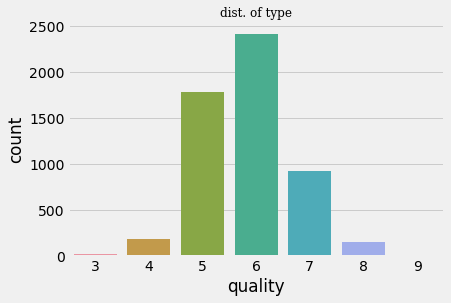

In [26]:
print(train['quality'].value_counts())
sns.countplot(x=train['quality']);
plt.title("dist. of type", fontfamily='serif',fontsize=12);

6등급의 와인이 가장 많이 있네요!

In [43]:
#distribution by 'quality'
numerical_columns = train.select_dtypes(exclude='object').columns.tolist()
# numerical_columns.remove('quality')
# numerical_columns.remove('free sulfur dioxide')
# numerical_columns.remove('total sulfur dioxide')

# def show_dist_plot(df, columns):
#     for column in columns:
#         f, ax = plt.subplots(1,2,figsize=(16,4))
#         sns.stripplot(x=df['quality'],y=df[column], ax=ax[0],hue=df['quality'])
#         sns.violinplot(data=df, x='quality', y=column, ax=ax[1])
        
# show_dist_plot(train, numerical_columns)

numerical_columns

['quality',
 'fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

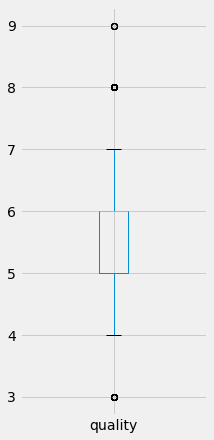

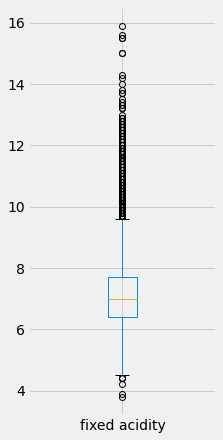

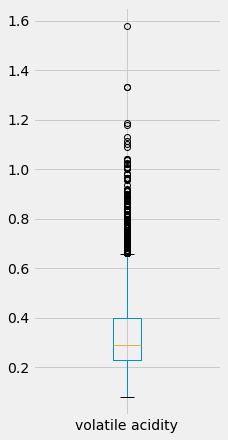

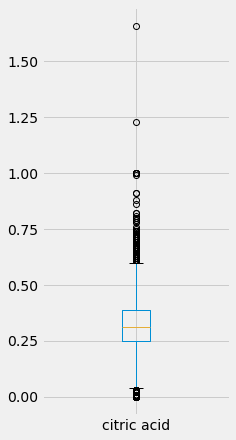

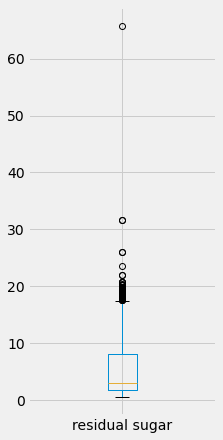

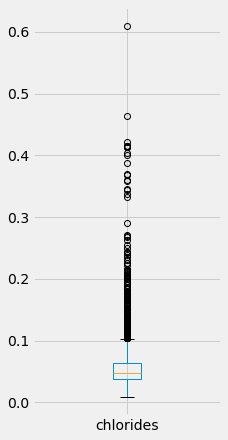

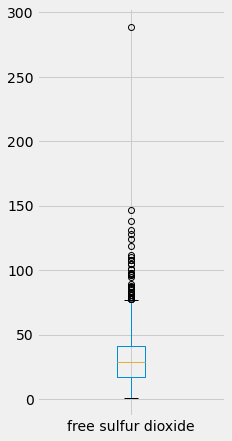

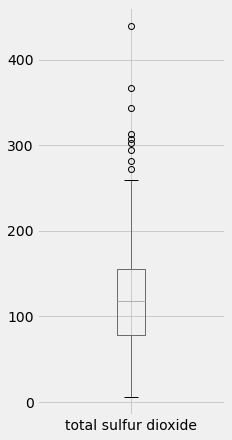

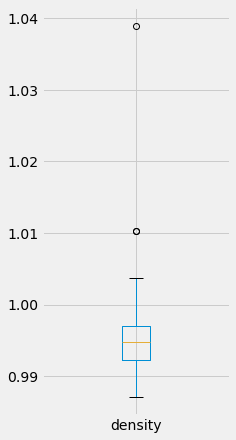

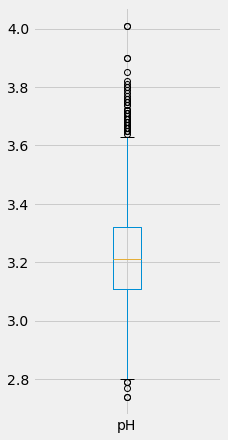

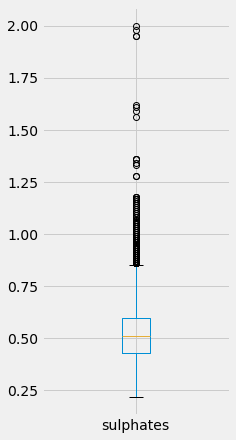

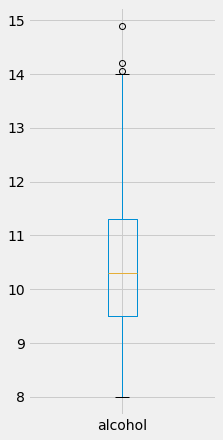

In [44]:
# train['alcohol']

for x in numerical_columns:
    plt.figure(figsize = (3, 7))
    boxplot = train.boxplot(column=[x])
    plt.show()

모든 피쳐들의 의미를 헤아리고, 유의미한 피쳐를 찾는 것은 분석에 있어 큰 도움이 됩니다.<br>
그러나, 피쳐의 수가 50개가 넘는다면? 모든 피쳐들을 헤아리기 힘들겠죠! <br>
그래서 피쳐들이 많을 때 ```train.corr()``` 상관관계를 통해서 힌트를 얻곤 합니다.

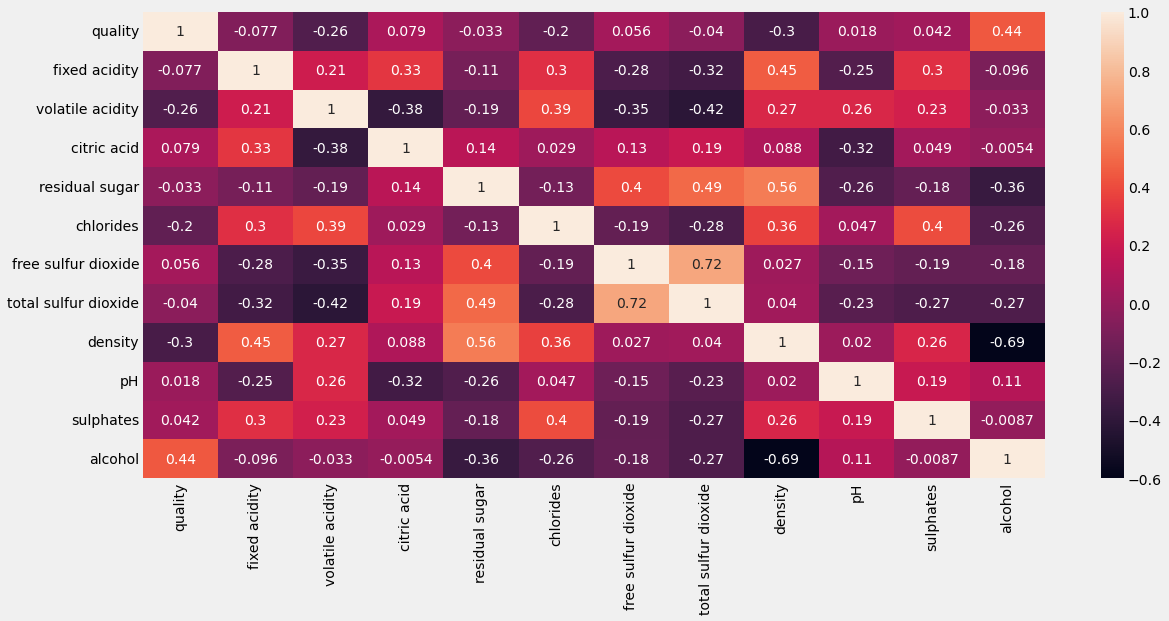

In [10]:
plt.figure(figsize=(18,8))
corr= train.corr()
sns.heatmap(corr, annot=True, square=False, vmin=-.6, vmax=1.0);

**주의! 상관관계와 인관관계는 다릅니다 **  <br>

분포에서의 관계가 있음을 알려주는 것이지, 원인과 결과의 관계는 아니라는 것! 기억해주세요 :)

관련 문서: https://ko.wikipedia.org/wiki/상관관계와_인과관계

# MODELING

In [10]:
#Library
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.metrics import plot_roc_curve,accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

In [30]:
#Standardscaler
ss= StandardScaler()
train[numerical_columns] = ss.fit_transform(train[numerical_columns])

#factorize
train['type'] = pd.factorize(train['type'])[0]

train.head(3)

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,5,-1.250611,2.186377,-1.78194,0.286345,-0.398500,-1.211937,-0.560852,-0.117252,1.372128,-0.605988,-0.255287,0
1,5,1.234899,1.665574,-1.23056,-0.638755,0.322998,-1.155351,-1.307080,0.738864,-0.183584,0.398147,-0.841348,1
2,5,0.535849,-0.785265,0.49250,-0.722855,0.034399,-0.532907,0.398583,-0.966732,-1.054782,-0.070450,0.330774,0


StandardScaler를 통해서 **표준화** 작업을 진행하였고, <br>
type을 0과 1로 변환해주었습니다. ML에서는 str은 들어가지 않으니 변환은 꼭! <br>
이외에도 encoding에는 ```pd.get_dummies()```, ```labelEncoder``` 등이 있습니다.

In [31]:
X = train.drop(['quality'],axis=1)
y = train.quality

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2, random_state=42)

* ```test_size : 0.2```   train과 test를 8:2로 구분한다는 의미!
* ```random_state : 42``` 같은 값으로 나오게 하기 위한 Seed 설정! 

In [33]:
X_train.shape, X_test.shape

((4397, 12), (1100, 12))

X_train과 X_test에서 type을 제외한 12개의 Feature이 있는 것을 볼 수 있습니다.

In [34]:
def Model(model):
    model.fit(X_train,y_train)
    score = model.score(X_test,y_test)
    model_train_score= model.score(X_train,y_train)
    model_test_score=model.score(X_test,y_test)
    prediction = model.predict(X_test)
    cm = confusion_matrix(y_test, prediction)
    print("Testing Score\n", score)
    plot_confusion_matrix(model,X_test,y_test,cmap='OrRd')

Testing Score
 0.6845454545454546


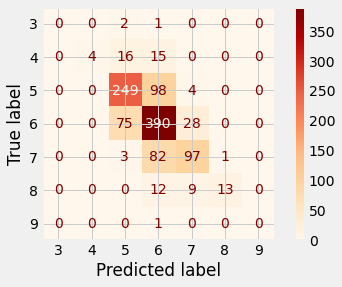

In [35]:
#RandomForest
rf= RandomForestClassifier()
rf.fit(X_train,y_train)
Model(rf)

5~7등급을 예측하는데 실제로 그러한 것이 높은 것을 볼 수 있네요.

In [36]:
#feature의 수가 동일한지 보고, train set에서 다룬 것처럼 testset에서 다루어 줍니다.
X_train.shape, test.shape 

((4397, 12), (1000, 13))

In [37]:

#drop index column
test= test.drop(['index'],axis=1)

#Standardscaler
ss= StandardScaler()
test[numerical_columns] = ss.fit_transform(test[numerical_columns])

#factorize
test['type'] = pd.factorize(test['type'])[0]

test.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,1.306951,-0.220579,1.098184,0.236865,-0.385503,-1.108531,-0.756734,-0.352060,-1.943080,-1.068114,1.000172,0
1,4.507070,0.477272,1.780836,-0.749722,0.343645,-0.888114,-1.327873,1.915724,-0.949812,-0.311854,-1.203025,1
2,-0.553583,-0.395042,-0.335387,-0.057012,-0.466520,0.709907,1.077835,-0.008456,-0.142782,1.063164,-0.864071,0


In [38]:
final_pred = rf.predict(test)

In [42]:
#submission
sample_submisson['quality'] = final_pred
sample_submisson.to_csv("/Users/user/Downloads/data/submission.csv",index=False)

이상 기초적인 와인 품질 분류였습니다. 감사합니다.

---

추가)앙상블 학습

<b>정형 데이터를 다루는 데 가장 뛰어난 성과를 내는 알고리즘

> RandomForest

![](https://miro.medium.com/max/1678/1*Wf91XObaX2zwow7mMwDmGw.png)

* bootstrap sample : 복원추출로 인한 <b>증복된 샘플 추출
    
기본적으로 bootstrap sample은 훈련 세트의 크기와 같게 만듭니다.

1. RandomForestClassifier : 전체 특성 개수의 제곱근만큼의 특성 선택이 '최선의 분할' <br>
    - 그러나, 회귀모델 RandomForestRegressor은 전체 특성 사용

In [49]:
#분류에 있어 각 피쳐에 대한 중요도 출력
rf.fit(X_train, y_train)
print(rf.feature_importances_)

[0.07462563 0.1004293  0.0792821  0.08282543 0.08676202 0.08753468
 0.09172778 0.10309731 0.08242459 0.08716809 0.11999131 0.00413175]


하나의 특성에 과도하게 집중하지 않고 더 많은 특성이 훈련에 기여할 기회를 얻는다면 일반화 가능성을 높혀줍니다.


> 이외에, 엑스트라 트리 (ExtraTreesClassifier)

1. 기본적으로 100개의 결정 트리 훈련
2. 부트스트랩 샘플을 사용하지 않습니다. = 전체 훈련 세트를 사용
3. 노드 분할 시, 가장 좋은 분할을 찾는 것이 아닌, 무작위로 분할 = DecisionTreeClassifier 내 splitter = 'random' 지정